### File I/O
Typically, a file is handled in three steps
1. Open the file
1. Read/Write to the file
1. Close the file

### Jupyter Magic Commands
1. These are commands **NOT** related to the Python language
1. There are two types
    1. Line commands: starts with a single %
    1. Cell commands: starts with two %%

1. Below we use the %%writefile command to write to a file in the current directory
1. **NOTE** This is done for **convenience**. We could have used  notepad or similar to create the file.
1. Again this is **NOT** related in any way to Python

In [ ]:
%%writefile somefile.txt
Line one
second line
Last line  

### Simple Example
1. Read the content of the file we have created in the previous cell
1. Since it is a text file (line oriented) we can
    1. read the whole file into a string
    1. read the file as **lines**

In [ ]:
# reading the whole file into a string
f=open("somefile.txt")
content=f.read()
print(type(content))
print(content)
f.close()

In [ ]:
f=open("somefile.txt","r")
for line in f:
    print(line)

### Alternatively

In [ ]:
## reading the file as separate lines
f=open("somefile.txt")
lines=f.readlines()
print(f'return value of readlines is {type(lines)}')
# compute the length of each line
length=list(map(len,lines))
# print each line, preceded by a number, omitting the last newline character '\n'
for i,line in enumerate(lines):
    print(f'{i} {line[:-1]}')
    # alternatively keep the \n but do not add an extra pne via print
    #print(f'{i} {line}',end='')
print(length)

### Word count utility (wc)

- Unix has a utility ```wc``` that when passed a file as input it outputs
    1. the number of lines
    1. the number of words
    1. the number of characters
- We will write a Python function to implement ```wc```

In [ ]:
f=open("somefile.txt")
lines=f.readlines()
nl,nw,nc=len(lines),0,0
for line in lines:
    nc+=len(line)
    tmp=line.split()
    nw+=len(tmp)
print(f'n lines={nl},n words={nw},n char={nc}')


### Writing to files

- To open file ```newFile.txt``` we need to specify mode "w"
- If **no other** option is specified
    1. The file is **created** if it does not exist
    1. The file is **truncated** if it exists
- We can modify the **default** behavior as follows
    1. To **append** to the file (prevent truncation) we add "a", i.e. "wa"

In [ ]:
## If "newFile.txt" does not exist it will be created
## If it does it will be truncated
f=open("newFile.txt","w")
f.writelines(["one\t","two\t"])
f.write("\nsecond line")
f.close()

f=open("newFile.txt","r")
s=f.read()
print(s)
f.close()

In [ ]:
## newFile will not be truncated 
## Anything we write is appended to the end
f=open("newFile.txt","a")
f.write("\nthird line")
f.close()
with open("newFile.txt") as f:
    s=f.read()
print(s)

## Exceptions

- When runtime errors occur the Python interpreter stops execution and reports the error
- Sometimes we would like to handle the error gracefully and continue the execution
- This can be done using the ```try...except``` block
- If an exception (error) occurs at a certain line in the ```try``` block the flow of execution continues in **corresponding**  ```except``` block
- An ```except``` block with **unspecified** exception type is **a catch all block**: it will catch all types of exceptions

In [119]:
a=[1,2,3]

## Index out of range error
try:
    a[3]
except:
    print("An error occurred")

## File not found errorb
try:
    f=open("nonExistantFile")
except:
    print("An error occurred")

An error occurred
An error occurred


#### Handling different exceptions differently

In [ ]:
try:
    filename="nonExistantFile"
    f=open(filename,"r")
except FileNotFoundError:
    print(f'file {filename} cannot be found')
except:
    pass


### Another example

- We would like to open a file and convert the string representation of numbers into integers
- There are two types of exceptions that could occur
    1. The file is not found
    2. Some of the strings cannot be converted to integers

In [120]:
%%writefile wrongNumbers.txt
1 2 3 4 y

Overwriting wrongNumbers.txt


In [121]:
%%writefile readNumbers.txt
1 2 3 4 5

Overwriting readNumbers.txt


In [112]:
def readNums(filename):
    try:
        f=open(filename,"r")
        line=f.readline().split()
        nums=list(map(int,line))
    except FileNotFoundError:
        print(f'file {filename} cannot be found')
        return 
    except ValueError:
        print(f'{filename} contains invalid values')
        return 
    except:
        print('Unknown error cannot proceed')
        return 
    return nums
nums=None
while nums==None: 
    filename=input("please enter the name of a file or Q to quit")
    if filename=="Q":
        break
    nums=readNums(filename)
    print(nums)



[1, 2, 3, 4, 5]


### Some Details about file IO
1. A file object in Python can be thought of as a **stream** (an ordered sequence) of characters in case of text files and a stream of bytes in the case of binary files
1. Python keeps the **current** position in the stream

In [ ]:
f=open("somefile.txt","r")
## initially the position is 0, the beginning
print(f.tell())
first_line=f.readline()
print(first_line)
## line one has 9 characters, including the \n character
print(f.tell())
c=f.read(1)
print(f'read {c} now the position is at {f.tell()}')
f.seek(0)
print(f.readline())

In [ ]:
f=open("newFile.txt","r+")
f.write("first column\t")
p=f.tell()
print(p)
f.write("second column")
f.seek(p-1)
f.write(',')
f.seek(0)
s=f.read()
for c in s:
    print(ord(c),end=' ')
print()
print(s)

## Monte Carlo

In [255]:
import numpy.random as rand
from math import pi
import matplotlib.pyplot as plt
def approximatePi(n):
    m = 0
    for i in range(n):
        x = rand.uniform(-1,1)
        y = rand.uniform(-1,1)
        if x**2+y**2<=1:
            m+=1
    return 4*m/n
ests = []
for n in range(10, 10001, 10):
    est = approximatePi(n)
    ests.append(est)

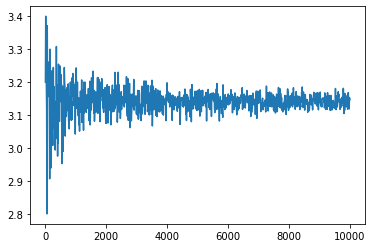

In [257]:
plt.plot(range(10,10001,10),ests)